# A brief Introduction to Python/Finance 


## Manipulating Real Stock Market Dataset 

- how _**O**pen **H**igh **L**ow **C**lose_ (OHLC) datasets are generated, and processing them with ease to derive useful insight 
- designing a simple trading strategy through temporal statistics over time series

### Download this Notebook
This notebook and data are available for download at: https://github.com/Andrea94c/luiss-thesis

### Example of an Electronic Market Data  (LOB)

A **limit order book (LOB) is a record of limit orders issued by traders** maintained at the exchange in a given moment. The orders are executed and they move the market to a new price (mid-price). The execution of orders during the hours/day/month define the candlestick, and they are stored into historical data that we can use to test/train trading strategies. 

<img src="data/press_images/LOB_ex.png" width="800" height="1100"/>

### OHLC Dataset

The most common dataset used in literature is the OHLC, which reflects the candlestick of a financial trading platforms. An **OHLC dataset is a record of the open, high, low, and close midprices of a stock for a given period**. **It can highlight increasing or decreasing momentum**. When the open and close are far apart it shows strong momentum, and when the open and close are close together it shows indecision or weak momentum. The high and low show the full price range of the period, useful in assessing volatility. There are several patterns traders watch for on OHLC charts.

<img src="data/press_images/AAPL_OHLC.png" width="600" height="1000"/>

Notice: in US market a trading day lasts for 6.5 hours, from 9:30 a.m. and ends at 4:00 p.m.. There is no trading activity during weekends and holidays. 

You can find some data inside the two folders:
data/
dataset/

In this jupyter I show you some stock from "data/" while "dataset/" can be used for your thesis, as it contains long time-series. You can also download real stock market dataset at https://finance.yahoo.com, finest granulatiry is daily. 




## Introduction to Pandas

We will start by using **pandas** (<a href="https://pandas.pydata.org/docs/">doc</a>), which is a Python package providing fast, flexible, and expressive data structures designed to make working
with “relational” or “labeled” data both easy and intuitive. It aims to be a high-level building
block for doing practical, real world **data analysis** in Python.

The two primary data structures of pandas, **Series** (1-dimensional) and **DataFrame** (2-dimensional), handle
the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering.
pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.width = 1200

import matplotlib
matplotlib.rc('figure', figsize=(10,3), dpi=200)

##### Creating a DataFrame 
A **DataFrame** is a 2-dimensional data structure that can store data of different types (including characters,
integers, floating point values, categorical data and more) in columns. It is similar to a spreadsheet, a
SQL table or the data.frame in R. Let us create one and print it.

In [2]:
# creating a dataframe by columns
data_cols = {"Name"  :["Alice", "Bob", "Claire"], 
             "Order" :["buy", "sell", "sell"], 
             "Volume":[14, 23, 44],
             "Price" :[120, 100, 800]}  # as a dictionary, column wise

df = pd.DataFrame(data_cols)
print(df)

     Name Order  Volume  Price
0   Alice   buy      14    120
1     Bob  sell      23    100
2  Claire  sell      44    800


In [3]:
# equivalently by rows
data_rows = [("Alice", "buy", 14, 120), 
             ("Bob", "sell", 23, 100), 
             ("Claire", "sell", 44, 800)]  # as a list, row wise

df = pd.DataFrame(data_rows, columns=['Name','Order', 'Volume', 'Price'])
print(df)

     Name Order  Volume  Price
0   Alice   buy      14    120
1     Bob  sell      23    100
2  Claire  sell      44    800


We will be dealing with data coming from **CSV** (**C**omma **S**eparated **V**alues) files. Two years: from 01-09-2019 to 01-09-2021.

In [4]:
!ls data

AAPL.csv         DIS.csv          MSFT.csv         lab2
AAPL_missing.csv FB.csv           NFLX.csv         press_images
AMZN.csv         GOOG.csv         PEP.csv
CSCO.csv         KO.csv           VZ.csv


##### Reading and visualizing a DataFrame stored as a CSV file

In [5]:
df = pd.read_csv("data/AAPL.csv")
print(df)

           Date        Open        High         Low       Close   Adj Close     Volume
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   50.594364   80092000
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   51.452770   76752400
2    2019-09-05   53.000000   53.492500   52.877499   53.320000   52.458759   95654800
3    2019-09-06   53.512501   53.605000   53.127499   53.314999   52.453835   77449200
4    2019-09-09   53.709999   54.110001   52.767502   53.542500   52.677662  109237600
..          ...         ...         ...         ...         ...         ...        ...
499  2021-08-25  149.809998  150.320007  147.800003  148.360001  148.360001   58991300
500  2021-08-26  148.350006  149.119995  147.509995  147.539993  147.539993   48597200
501  2021-08-27  147.479996  148.750000  146.830002  148.600006  148.600006   55721500
502  2021-08-30  149.000000  153.490005  148.610001  153.119995  153.119995   90956700
503  2021-08-31  152.660004  152.800003  15

In [6]:
print(df.head(5))

         Date       Open       High        Low      Close  Adj Close     Volume
0  2019-09-03  51.607498  51.744999  51.055000  51.424999  50.594364   80092000
1  2019-09-04  52.097500  52.369999  51.830002  52.297501  51.452770   76752400
2  2019-09-05  53.000000  53.492500  52.877499  53.320000  52.458759   95654800
3  2019-09-06  53.512501  53.605000  53.127499  53.314999  52.453835   77449200
4  2019-09-09  53.709999  54.110001  52.767502  53.542500  52.677662  109237600


##### Indexing by integer or label index

In [7]:
print(df.iloc[0:30:5, [0,2,3]]) # rows 0 to 29 with step 5; columns 0, 2, 3   

          Date       High        Low
0   2019-09-03  51.744999  51.055000
5   2019-09-10  54.195000  52.927502
10  2019-09-17  55.205002  54.779999
15  2019-09-24  55.622501  54.297501
20  2019-10-01  57.055000  56.049999
25  2019-10-08  57.014999  56.082500


In [8]:
print(df.columns)  # horizontal index (header)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [9]:
print(df.index)   # vertical index

RangeIndex(start=0, stop=504, step=1)


In [10]:
date_start, date_end = "2019-10-09", "2019-11-13"
df_out = df.loc[date_start: date_end, ["Open", "Close"]]  # WARNING! This won't work 
print(df_out)

Empty DataFrame
Columns: [Open, Close]
Index: []


In [11]:
df = df.set_index('Date')
df_out = df.loc[date_start: date_end: 5, ["Open", "Close"]]  # OK! rows 0 to 29; columns 0, 2, 3  
print(df_out)

                 Open      Close
Date                            
2019-10-09  56.757500  56.757500
2019-10-16  58.342499  58.592499
2019-10-23  60.525002  60.794998
2019-10-30  61.189999  60.814999
2019-11-06  64.192497  64.309998
2019-11-13  65.282501  66.117500


In [12]:
# alternatively, do when reading 
# df = pd.read_csv("data/AAPL.csv", parse_dates=True, index_col="Date")

In [13]:
# Notice this semantic equivalence 
df1 = df[["Open", "Close"]]
df2 = df.loc[:, ["Open", "Close"]]

# Notice this semantic equivalence
df3 = df[:10]
df4 = df.iloc[:10]

##### Plotting price curves

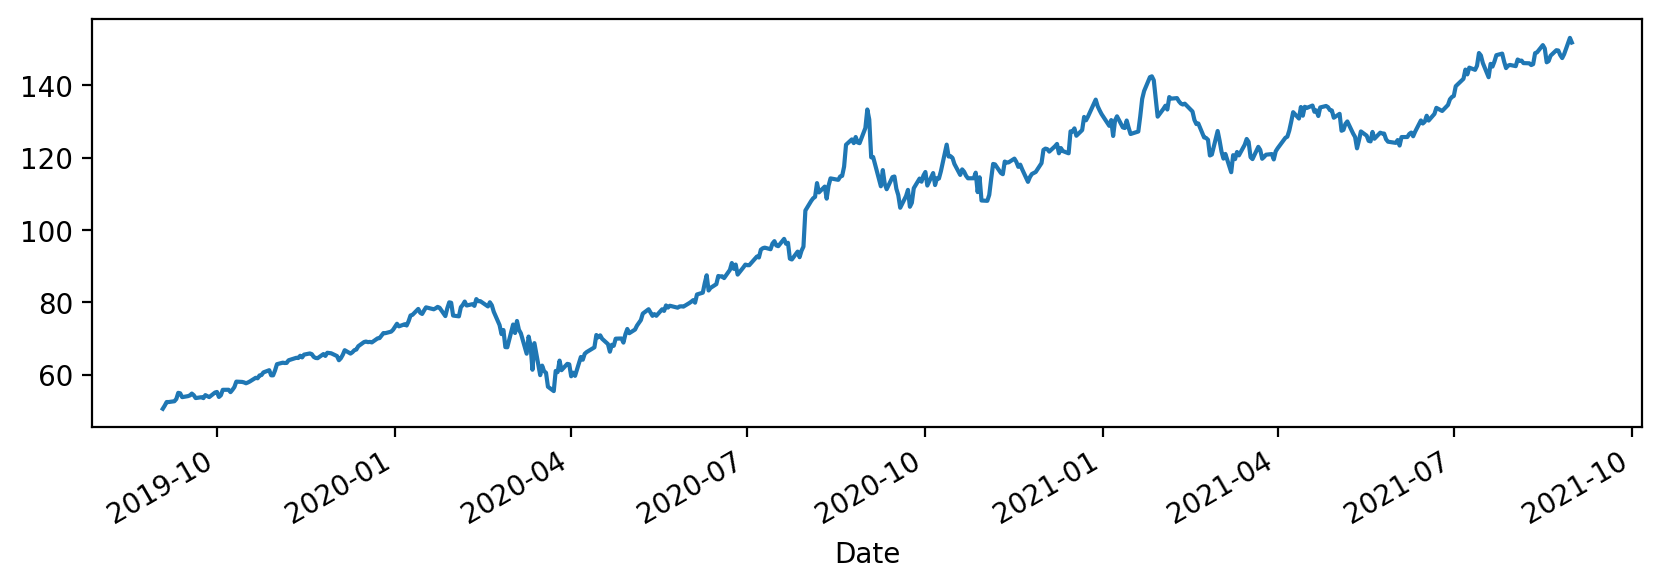

In [14]:
# plot the adjusted close for Apple
df_ap = pd.read_csv("data/AAPL.csv", parse_dates=True, index_col="Date")
df_ap['Adj Close'].plot()
plt.show()

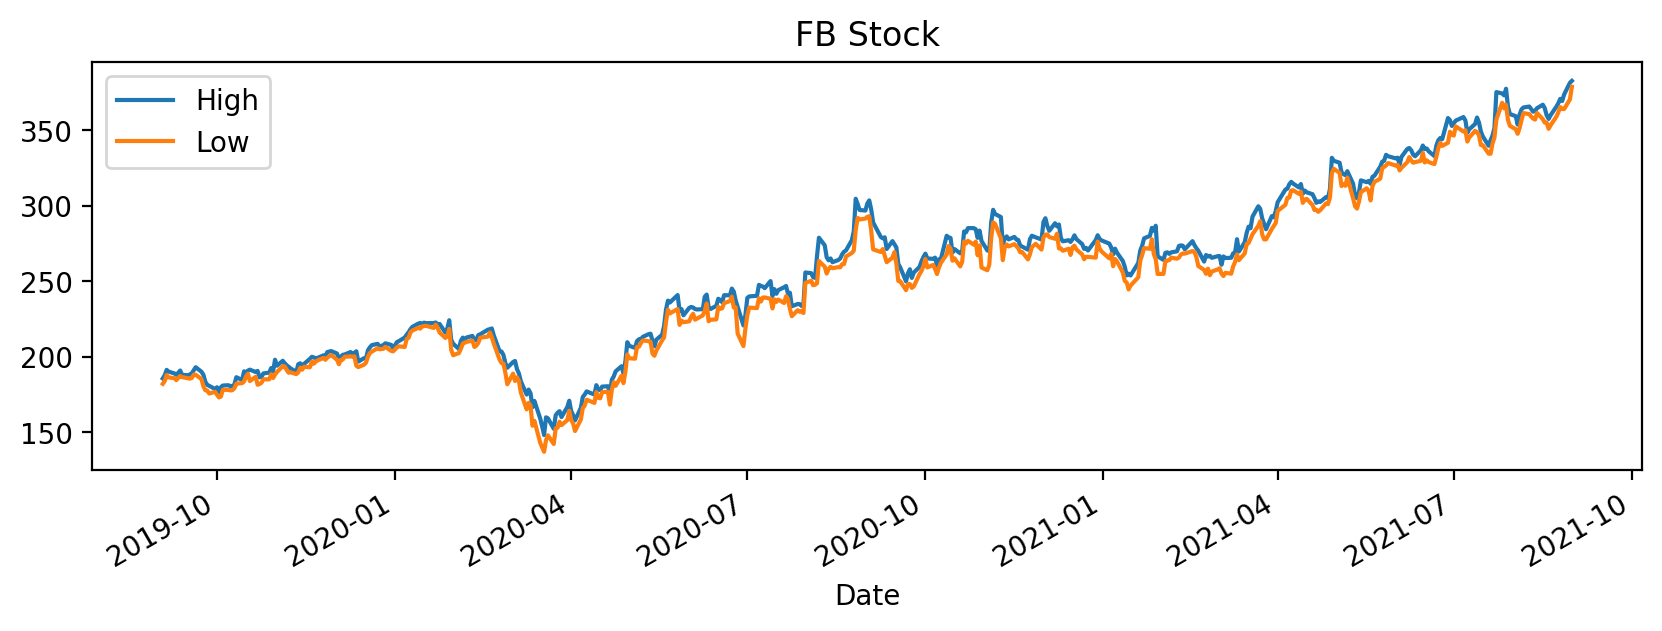

In [15]:
# Plot high and low for Facebook
df_fb = pd.read_csv("data/FB.csv", parse_dates=True, index_col="Date")
df_fb[['High', 'Low']].plot(title="FB Stock")
plt.show()

##### Plotting candle sticks

A candlestick is a type of _price chart_ used in technical analysis that displays the high, low, open, and closing prices of a security for a specific period. It **tells investors whether the closing price was higher or lower than the opening price** (black/red if the stock closed lower, white/green if the stock closed higher).

<img src="data/press_images/AAPL_candle.png" />

<img src="data/press_images/candles.png" width="600" height="1000"/>

In [16]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
fig.show()

## Trading  - Fundamental vs Techinical Analysis 

Trading firms use **Fundamental analysis** and **technical analysis** to forecast price trend of the stock in future. **Fundamental Analysis** exams the basic economic factors which drives commodities, stocks and bonds prices. 
**Technical Analysis** forecasts the price of a share according its the past performance statistics, assuming that the price of a share is mainly based on demand and supply forces operating in the stock market. 

<br> 
<br> 

<img src="data/press_images/tech_vs_fund.png" width="800" height="1100"/>


## Some tecnical indicators:
1 - Moving average (MA)  (https://www.investopedia.com/terms/m/movingaverage.asp)
<br>
2 - Exponential moving average (EMA)  (https://www.investopedia.com/terms/e/ema.asp)
<br>
3 - Moving average convergence divergence (MACD)  (https://www.investopedia.com/terms/m/macd.asp)
<br>
4 - Bollinger bands (https://www.investopedia.com/terms/b/bollingerbands.asp)
<br>
5 - Relative strength index (RSI) (https://www.investopedia.com/terms/r/rsi.asp)
<br> 
...

#### Python libraries to compute indicators

These tecnical indicators can be computed manually, or there are several libraries in python to compute them:

For example, Pandas_ta - https://pypi.org/project/pandas-ta/

## A first example on python - Bollinger Bands

A **Bollinger Band®** is a technical analysis tool defined by a set of **trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA)** of a security's price, but which can be adjusted to user preferences. Bollinger Bands® were developed and copyrighted by the famous technical trader John Bollinger, designed to  identify when an asset is oversold or overbought. Many traders believe the closer the prices move to the upper band, the more overbought the market is, and the closer the prices move to the lower band, the more oversold the market is <a href="https://www.investopedia.com/terms/b/bollingerbands.asp">[1]</a>.

We now read the whole APPL (Apple Inc.) dataset available in the _data_ directory, computing and plotting the Bollinger bands of the adjusted close price, moving average (20 days window size) and the adjusted close price itself. Then we identify potential buying and selling opportunities and plotting vertical lines in the plot: green corresponding to buy signals, red to sell signals. 
** Note:** These signals, along the prices and other features, can be useful to build the dataset for your thesis. 

The output plot should look similar to this:
<img src="data/press_images/signals_by_boil.svg"/>


Additional material:
- https://www.investopedia.com/terms/b/bollingerbands.asp
- https://www.bollingerbands.com/bollinger-band-rules
- https://www.iforex.in/bollinger-bands

<AxesSubplot:>

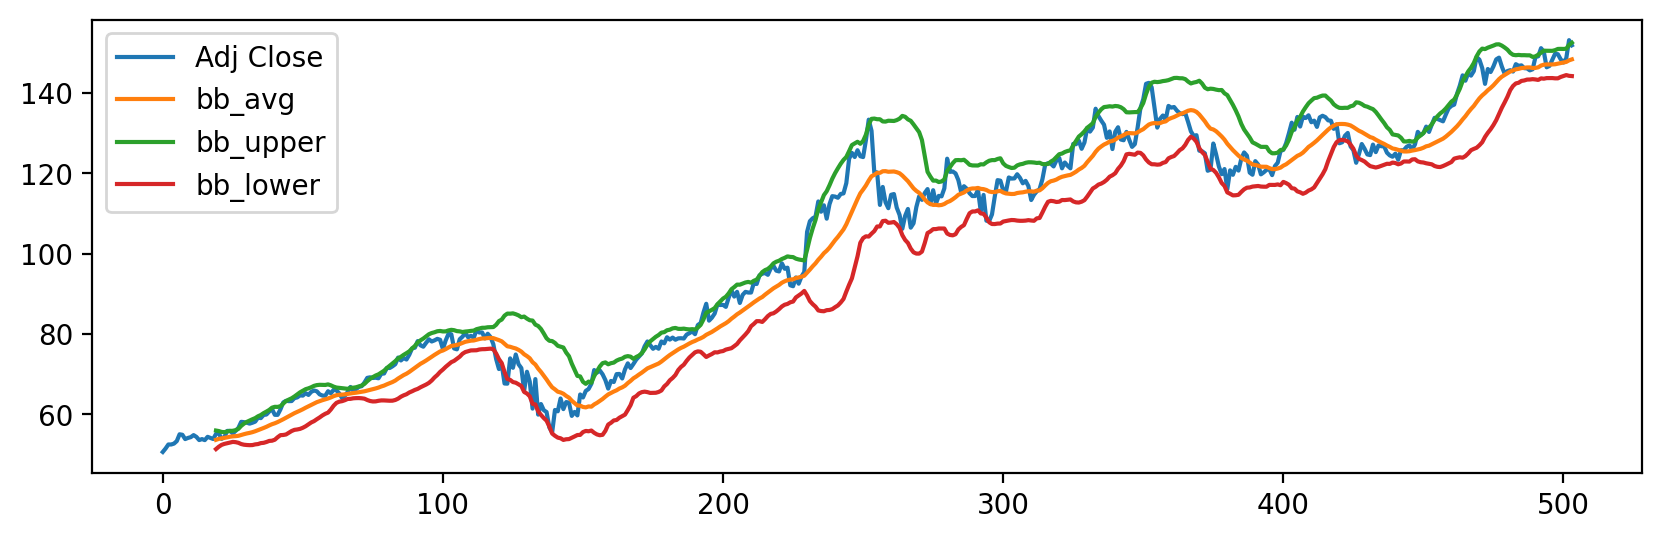

In [29]:
# First: we read the data from AAPL
df = pd.read_csv("data/AAPL.csv")

# we import libraries to compute the tecnical indicators
from ta.utils import dropna
from ta.volatility import BollingerBands

# Initialize Bollinger Bands Indicator
df = df[["Adj Close"]]
indicator_bb = BollingerBands(close=df["Adj Close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_avg'] = indicator_bb.bollinger_mavg()
df['bb_upper'] = indicator_bb.bollinger_hband()
df['bb_lower'] = indicator_bb.bollinger_lband()

df.plot()

### Now we would like to compute the "buy" and "sell" signals, to build our dataset.

What we can do? We iterate on each day, and when the price is over the **upper** (green) bollinger band we **sell**, when the price is under the **lower** (red) bollinger bands we **buy**.

In [30]:
sell = []
buy = []
flag = True

# we add a new row with the action 
df["Action"] = "None"

for index, row in df.iterrows():
    if row['Adj Close'] > row['bb_upper'] and flag:
        df.at[index, "Action"] = "Sell"
        sell.append(index)
        flag = False
    elif row['Adj Close'] < row['bb_lower'] and flag:
        df.at[index, "Action"] = "Buy"
        buy.append(index)
        flag = False
    elif row['Adj Close'] < row['bb_upper'] and row['Adj Close'] > row['bb_lower']:
        flag = True

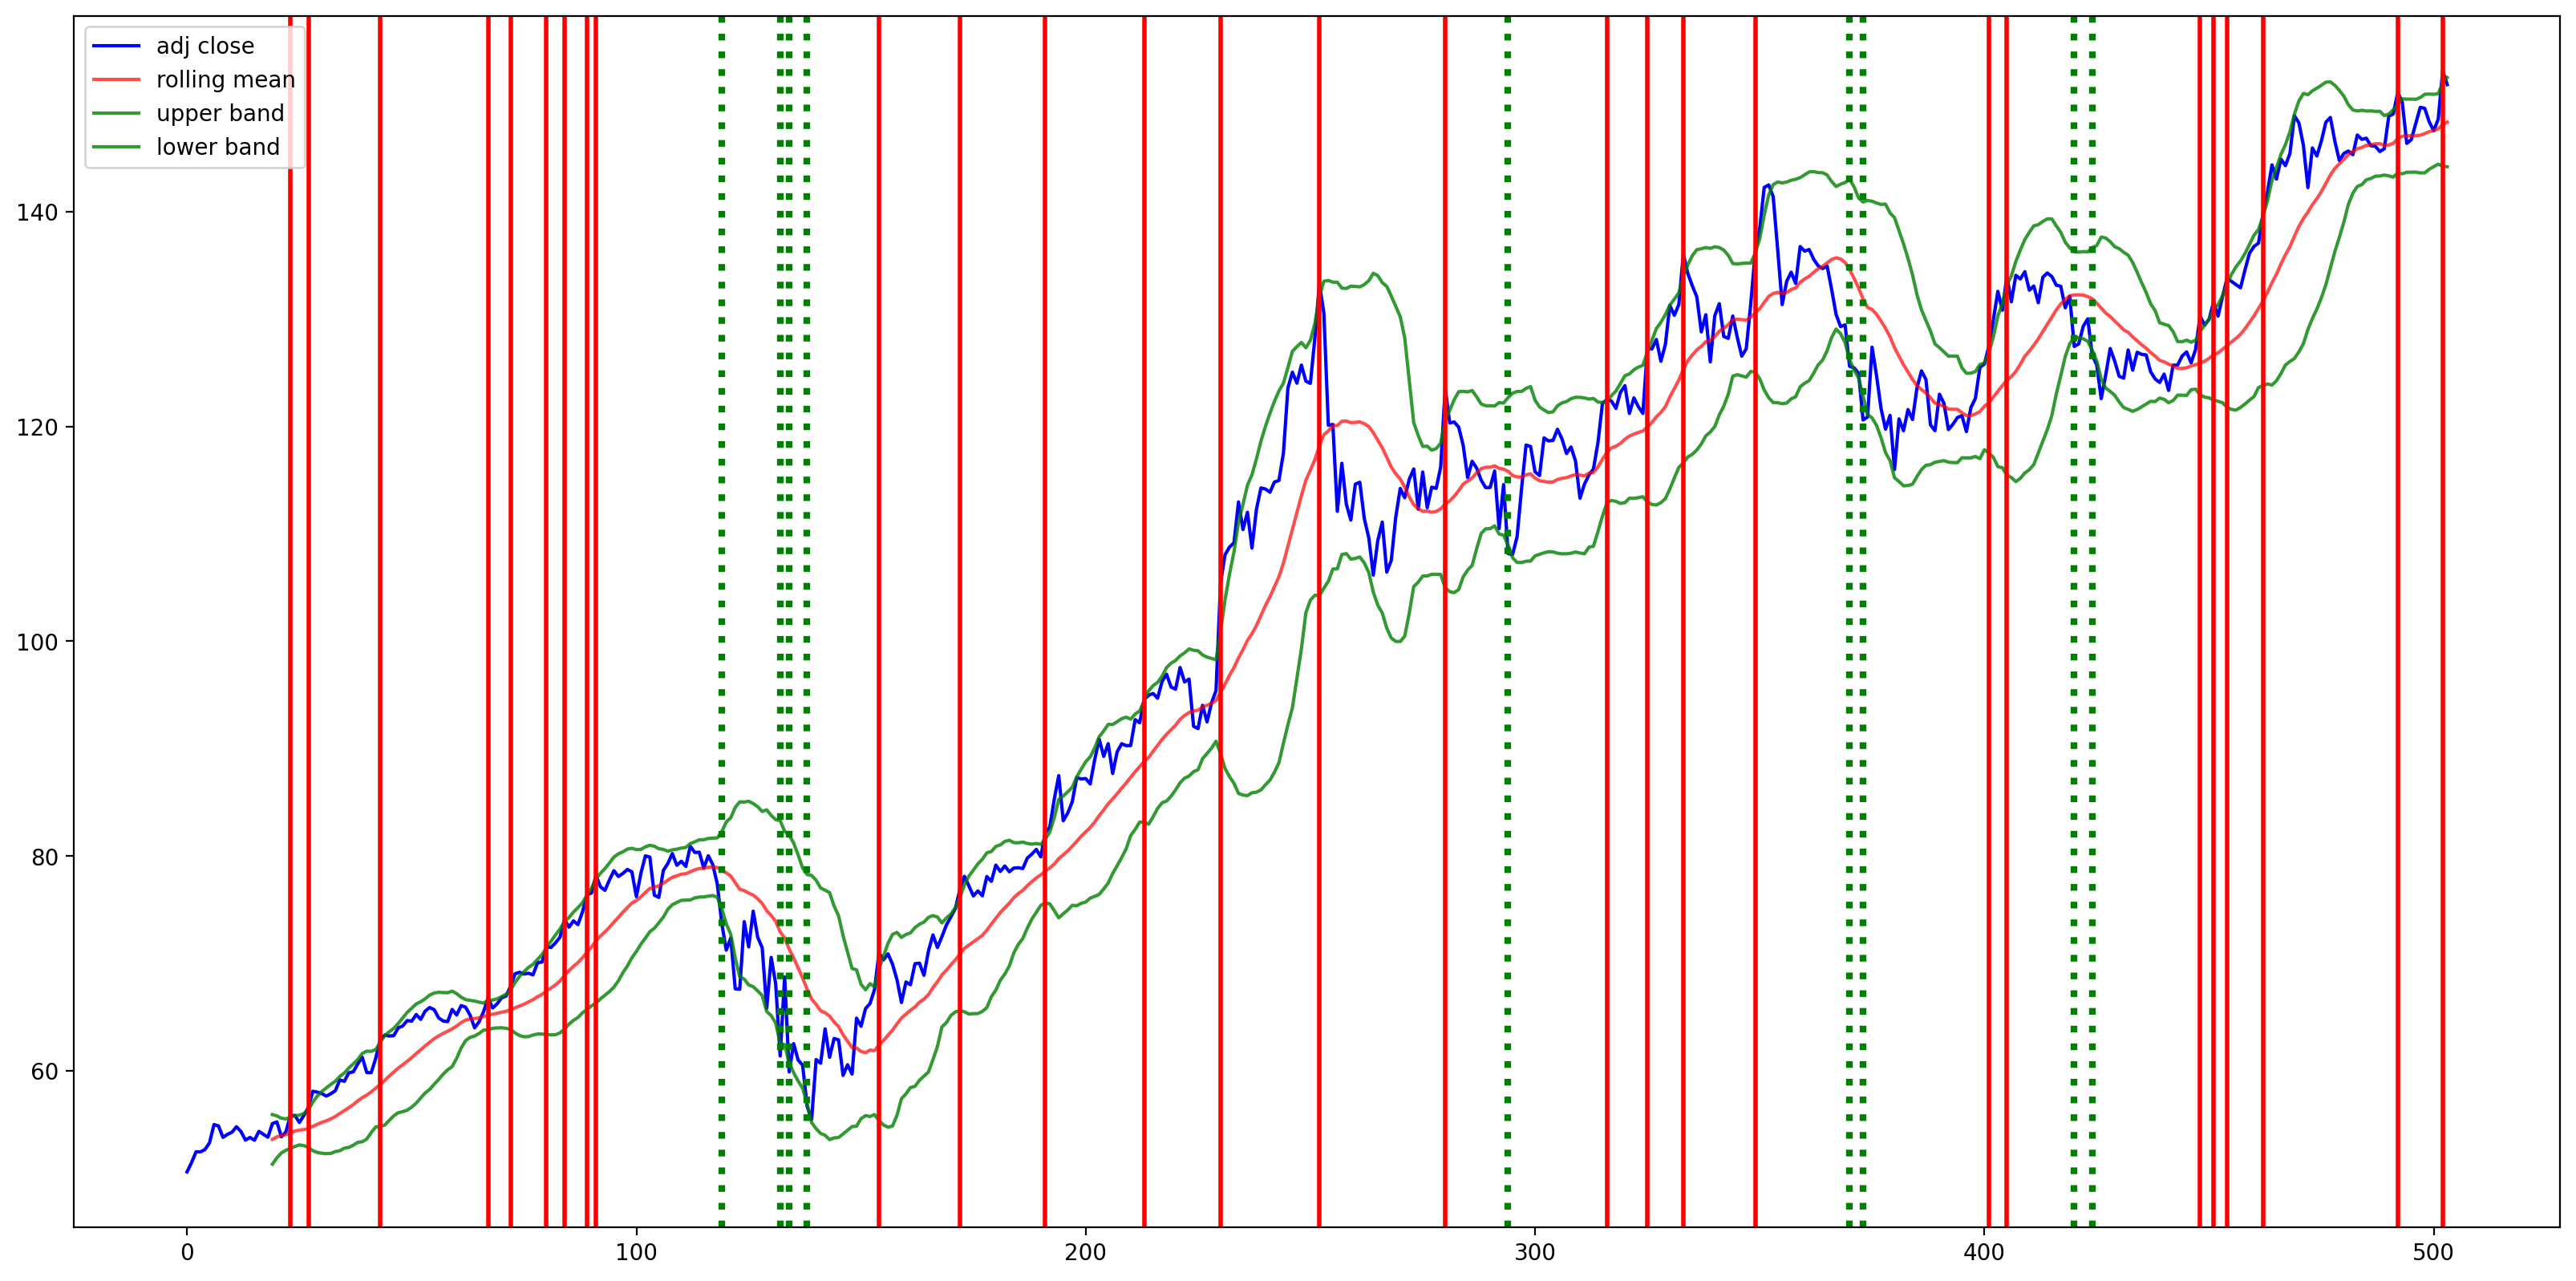

In [35]:
### Now we plot the results, both the df and the signals

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(df.index, df['Adj Close'], color = 'b')
ax.plot(df.index, df.bb_avg, color = 'r', alpha = 0.7)
ax.plot(df.index, df.bb_upper, color = 'g', alpha = 0.8)
ax.plot(df.index, df.bb_lower, color = 'g', alpha = 0.8)
ax.legend(('adj close', 'rolling mean', 'upper band', 'lower band'))

for el in sell: 
    ax.axvline(el, linewidth=2, color='r')
for el in buy: 
    ax.axvline(el, linewidth=3, color='g', linestyle = ':')

plt.gcf()
plt.show()

### Now the result df contains some data you can use for your ML task!

The columns "Adj Close", "bb_avg", "bb_upper", "bb_lower" can be your features, while the "Action"

In [37]:
df[["Adj Close"]]

Adj Close      bb_avg    bb_upper    bb_lower Action
0     50.594364         NaN         NaN         NaN   None
1     51.452770         NaN         NaN         NaN   None
2     52.458759         NaN         NaN         NaN   None
3     52.453835         NaN         NaN         NaN   None
4     52.677662         NaN         NaN         NaN   None
..          ...         ...         ...         ...    ...
499  148.360001  147.450296  150.949235  143.951357   None
500  147.539993  147.556190  150.929116  144.183264   None
501  148.600006  147.704101  150.986484  144.421717   None
502  153.119995  148.094985  151.951867  144.238103   Sell
503  151.830002  148.329508  152.484388  144.174628   None

[504 rows x 5 columns]